## Problem Statment

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## Hypothesis

Salary: Applicants with high salary should have high chances of loan approval<br>
Previous history: If loan was payed correctly high chance of approval<br>
Loan Amount: If loan amount is less, higher the chance loan approval<br>
Loan term:Loan for less time and less amount, higher chance of approval<br>
Loan EMI: Lesser the amount monthly to be paid to load, higher chance of approval<br>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly import subplots
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"./loan_prediction/train_ctrUa4K.csv")
test = pd.read_csv(r"./loan_prediction/test_lAUu6dG.csv")

train_org = train.copy()
test_org = test.copy()

num_cols = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
cat_cols = ['Gender', 'Married', 'Self_Employed','Credit_History','Property_Area', 'Dependents', 'Property_Area', 'Education']
ordinal_cols = ['Dependents', 'Property_Area', 'Education']
target_col = 'Loan_Status'
nominal_cols = list(set(cat_cols).difference(set(ordinal_cols)))

# Change data type
train[cat_cols] = train[cat_cols].astype('category')

### Univariate Analysis

### Numerical cols

########## Variable: ApplicantIncome ##########


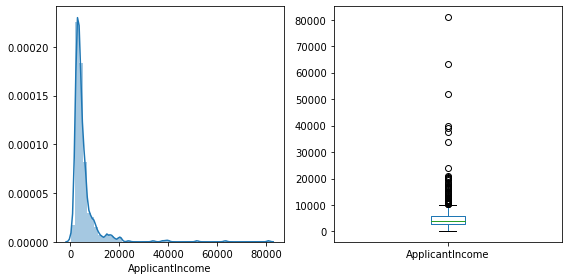

########## Variable: CoapplicantIncome ##########


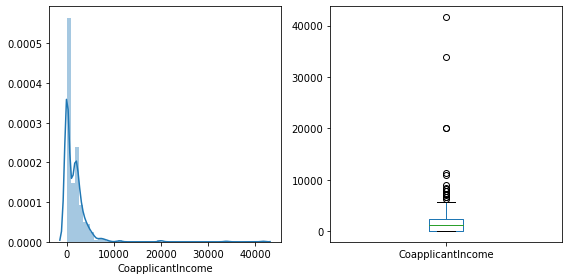

########## Variable: LoanAmount ##########


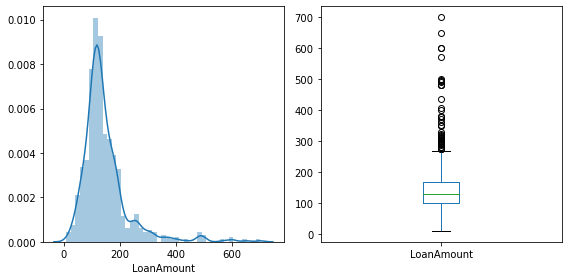

########## Variable: Loan_Amount_Term ##########


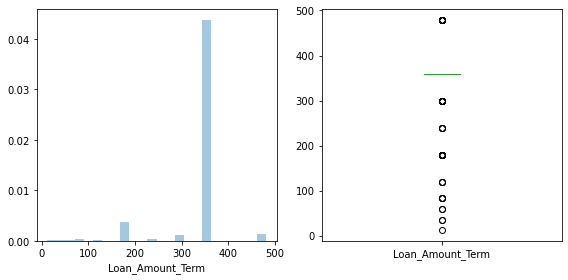

In [3]:
for col in num_cols:
    print("#"*10 + " Variable: {} ".format(col) + "#"*10)
    plt.figure(1, figsize=(8,4))
    plt.subplot(1,2,1)
    sns.distplot(train[col])
    plt.subplot(1,2,2)
    train[col].plot.box()
    plt.tight_layout()
    plt.show()
    plt.close()

### Nominal cols

########## Variable: Gender ##########
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


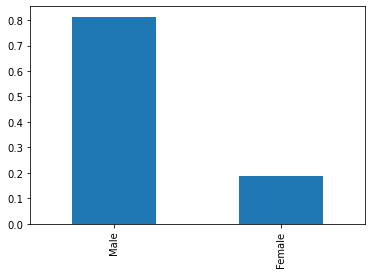

########## Variable: Married ##########
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


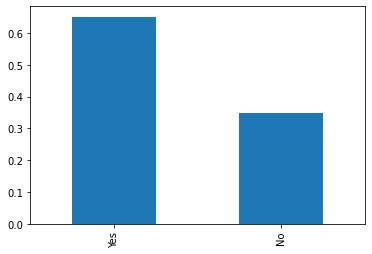

########## Variable: Credit_History ##########
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


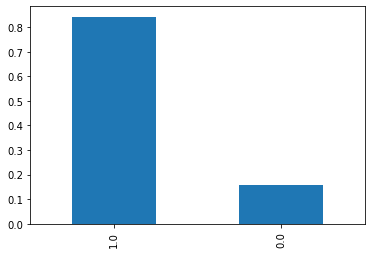

########## Variable: Self_Employed ##########
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


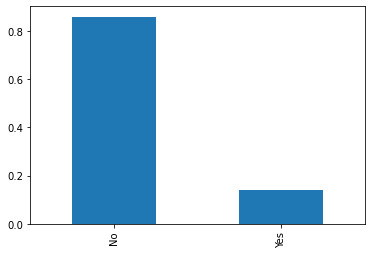

In [4]:
for col in nominal_cols:
    print("#"*10 + " Variable: {} ".format(col) + "#"*10)

    # Frequency table
    df = train[col].value_counts(normalize=True)
    print(df)
    df.plot.bar()
    plt.show()

### Ordinal cols

########## Variable: Dependents ##########
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


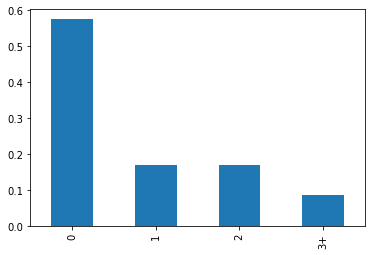

########## Variable: Property_Area ##########
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


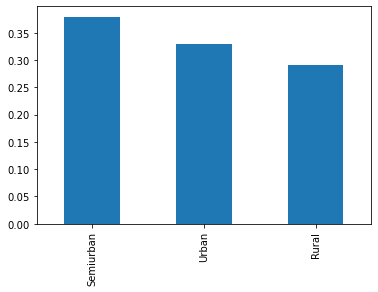

########## Variable: Education ##########
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


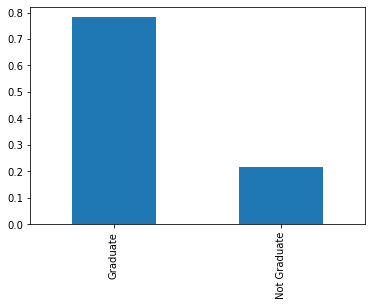

In [5]:
for col in ordinal_cols:
    print("#"*10 + " Variable: {} ".format(col) + "#"*10)

    # Frequency table
    df = train[col].value_counts(normalize=True)
    print(df)
    df.plot.bar()
    plt.show()    

### Bivariate Analysis

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

########## Variable: Gender ##########
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


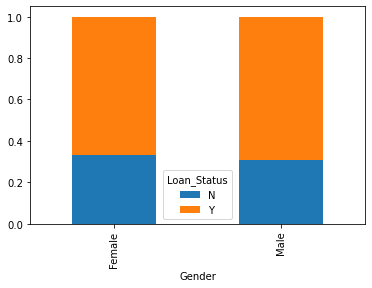

########## Variable: Married ##########
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


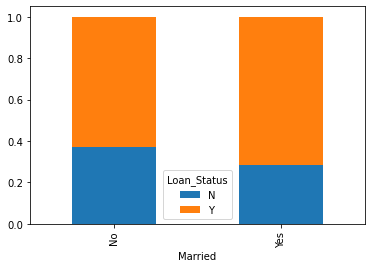

########## Variable: Self_Employed ##########
Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


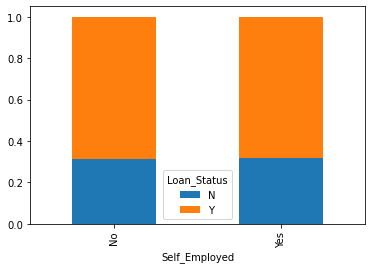

########## Variable: Credit_History ##########
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


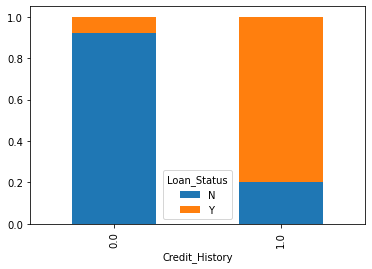

########## Variable: Property_Area ##########
Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


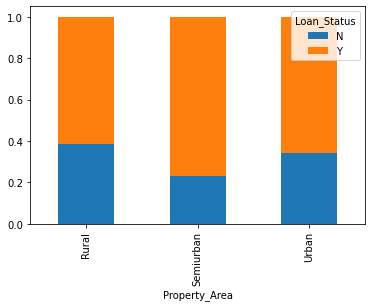

########## Variable: Dependents ##########
Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


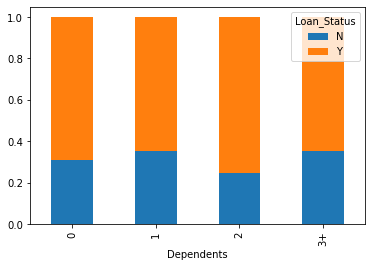

########## Variable: Property_Area ##########
Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


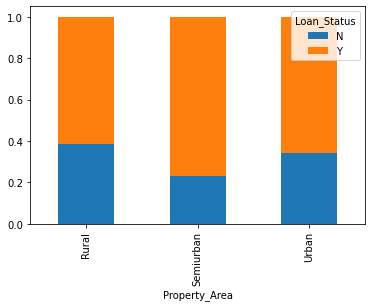

########## Variable: Education ##########
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


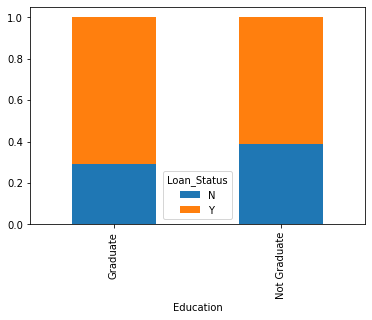

In [29]:
for col in cat_cols:
    print("#"*10 + " Variable: {} ".format(col) + "#"*10)
    df = pd.crosstab(train[col], train['Loan_Status'])
    df = df.div(df.sum(1).astype(float), axis=0)
    print(df)
    df.plot(kind='bar', stacked=True)
    plt.show()

### Numerical - Cat (target) variable

In [35]:
bins = [0, 2500, 4000, 6000, 81000]
labels = ['low', 'medium', 'high', 'very high']

<AxesSubplot:xlabel='ApplicantIncome'>

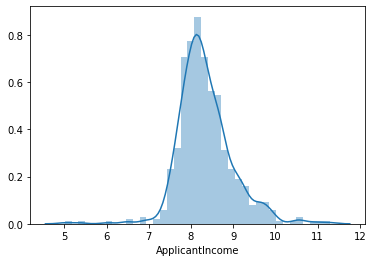

In [39]:
sns.distplot(np.log(train['ApplicantIncome']))

In [36]:
pd.cut(train['ApplicantIncome'], bins=bins, labels=labels)

0           high
1           high
2         medium
3         medium
4           high
5           high
6            low
7         medium
8           high
9      very high
10        medium
11           low
12        medium
13           low
14           low
15          high
16        medium
17        medium
18          high
19        medium
20     very high
21          high
22        medium
23        medium
24        medium
25     very high
26        medium
27          high
28           low
29        medium
         ...    
584       medium
585         high
586          low
587          low
588         high
589       medium
590       medium
591         high
592    very high
593       medium
594    very high
595       medium
596    very high
597       medium
598    very high
599         high
600          low
601       medium
602         high
603       medium
604    very high
605          low
606       medium
607       medium
608       medium
609       medium
610         high
611    very hi

## Model Building

In [9]:
train.drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
